<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/9_20_%EC%84%B8%EC%85%98_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [13]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

### Step 4. See the first 10 entries

In [8]:
chipo.head(10)

,order_id\tquantity\titem_name\tchoice_description\titem_price
0,1\t1\tChips and Fresh Tomato Salsa\tNULL\t$2.39
1,1\t1\tIzze\t[Clementine]\t$3.39
2,1\t1\tNantucket Nectar\t[Apple]\t$3.39
3,1\t1\tChips and Tomatillo-Green Chili Salsa\tN...
4,2\t2\tChicken Bowl\t[Tomatillo-Red Chili Salsa...
5,3\t1\tChicken Bowl\t[Fresh Tomato Salsa (Mild)...
6,3\t1\tSide of Chips\tNULL\t$1.69
7,4\t1\tSteak Burrito\t[Tomatillo Red Chili Sals...
8,4\t1\tSteak Soft Tacos\t[Tomatillo Green Chili...
9,"5\t1\tSteak Burrito\t[Fresh Tomato Salsa, [Ric..."


### Step 5. Create a histogram of the top 5 items bought

<ipython-input-16-17b157fddfcc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")


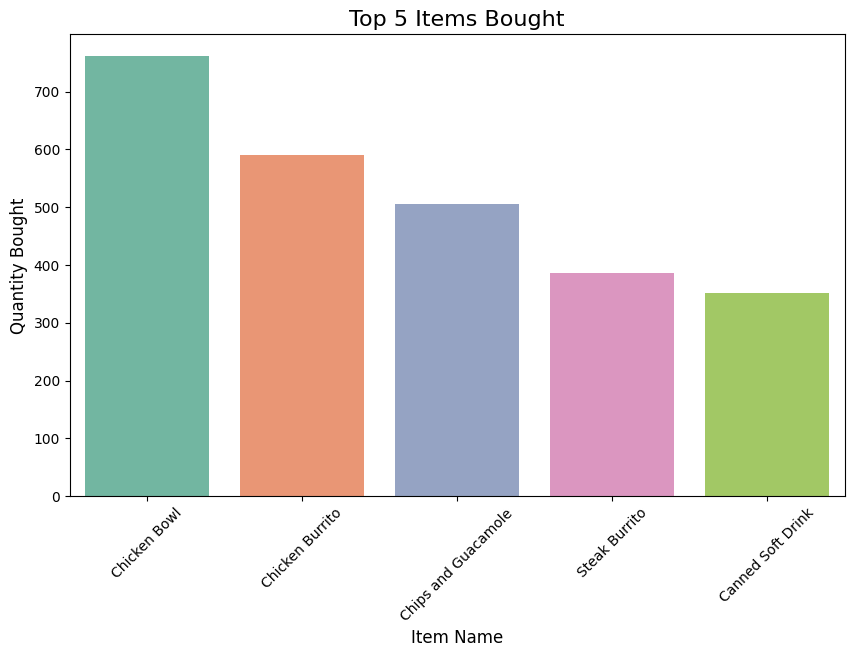

In [16]:
# groupby를 통해 item을 산 quantity의 개수를 계산
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

# 가장 많이 산 5개의 histogram 그리기
plt.figure(figsize=(10,6))
sns.barplot(x=top_items.index, y=top_items.values, palette="Set2")

# 그래프 title과 label 붙이기
plt.title('Top 5 Items Bought', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

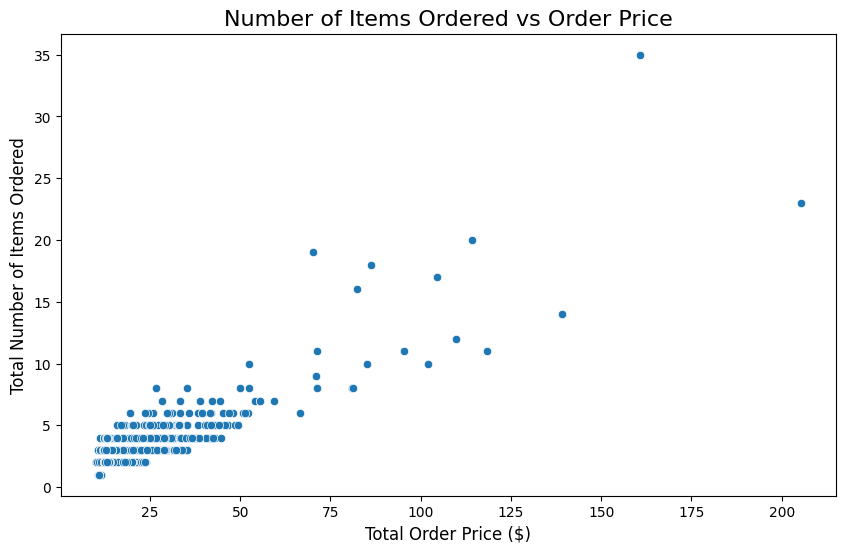

In [23]:
# total quantity and total price per order 구하기 위해 groupby 정렬
order_data = chipo.groupby('order_id').aggregate(total_items=('quantity', 'sum'),total_price=('item_price', 'sum')).reset_index()

# 산점도 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_price', y='total_items', data=order_data)

# 그래프 title과 label 붙이기
plt.title('Number of Items Ordered vs Order Price', fontsize=16)
plt.xlabel('Total Order Price ($)', fontsize=12)
plt.ylabel('Total Number of Items Ordered', fontsize=12)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-21-437a2473b10b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x=top_items.index, y=top_items.values, palette="Set2")


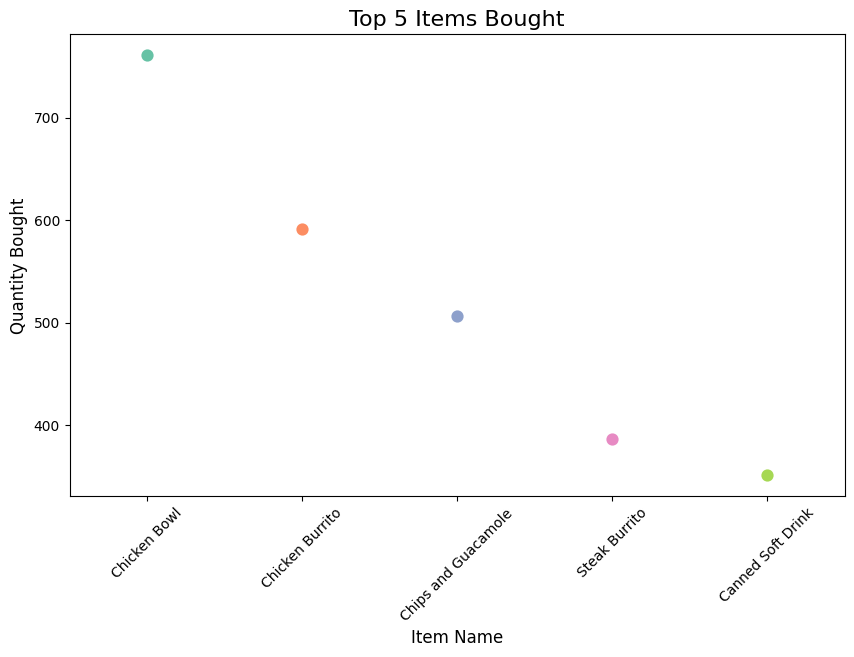

In [21]:
# 가장 많이 구매한 아이템 5개에 대해 점 플롯(point plot)을 그리기

# 아이템 이름으로 groupby 후 각 아이템이 주문된 횟수를 집계
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

# 상위 5개 아이템 기반으로 pointplot 그리기
plt.figure(figsize=(10,6))
sns.pointplot(x=top_items.index, y=top_items.values, palette="Set2")

# 그래프 title과 label 붙이기
plt.title('Top 5 Items Bought', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.show()